# Figure 4 (NLP 2023.6)

In [1]:
import os
import numpy as np
import pickle

from config import MRI8_NVF4_10mm_0p0mmVVVV as cfg

os.chdir('../')
from lib.methods import *
from lib.figure import NLP

os.chdir('../')

## Load data

In [2]:
csv_data_list, video_data_list, video_t_data_list = LoadCSVandVIDEOS(
                                                                    csv_path=cfg.CSV_FILE_DIR+cfg.DATA_NAME+cfg.CSV_ADDITIONAL_PATH+'.csv', 
                                                                    data_name_list=['t', 'mic', 'flow'], 
                                                                    sample_span=cfg.SAMPLE_SPAN, 
                                                                    videos_path_list=[
                                                                                    cfg.VIDEO_FILE_DIR+'VF/'+cfg.DATA_NAME+'.avi',
                                                                                    cfg.VIDEO_FILE_DIR+'FVF/'+cfg.DATA_NAME+'.avi',
                                                                                    ]
                                                                    )

Loading csv data
file path | ./data/VF_FVF_DATASETS/CSV/MRI8_NVF4_10mm_0p0mmVVVV.csv
data list | t, mic, flow
Loading video data
file path | ./data/VF_FVF_DATASETS/VIDEO/VF/MRI8_NVF4_10mm_0p0mmVVVV.avi


Loading video data
file path | ./data/VF_FVF_DATASETS/VIDEO/FVF/MRI8_NVF4_10mm_0p0mmVVVV.avi


## Pre-process

In [3]:
PP = PreProcessing(
                data=csv_data_list[1], ### mic data
                t_data=csv_data_list[0], ### mic t data
                video_data_list=video_data_list, 
                video_t_data_list=video_t_data_list
                )
PP.filter()
PP.linescanning_video(params_list=[cfg.LINE_SCANNING_PARAMS_VF, cfg.LINE_SCANNING_PARAMS_FVF])

mic_data = PP.data
mic_t_data = PP.t_data
video_data_list = PP.video_data_list
video_t_list = PP.video_t_data_list

flow_data = csv_data_list[2]
video_vf_data = video_data_list[0]
video_fvf_data = video_data_list[1]
video_t_data = video_t_data_list[0]

## Load latent vector data

In [4]:
latent_vector_vf = pickle.load(open(cfg.LV_DIR+cfg.DATA_NAME+'_vf.pkl', 'rb'))
latent_vector_fvf = pickle.load(open(cfg.LV_DIR+cfg.DATA_NAME+'_fvf.pkl', 'rb'))

## Bifurcation convert

In [5]:
BC_vf = BifurcationConvert(data=latent_vector_vf, parameter_data=flow_data, t_data=video_t_data)
BC_vf.convert(params = cfg.BF_CONVERT_PARAMS)
BC_vf.discretization(params = cfg.BF_DISCRETIZATION_PARAMS_VF)
param_lim = cfg.SINDY_PARAM_LIM
bifurcation_parameter_vf_list = BC_vf.bifurcation_parameter_list[param_lim[0]:param_lim[-1]]
bifurcation_data_vf_list = BC_vf.bifurcation_data_list[param_lim[0]:param_lim[-1]]
bifurcation_t_data_vf_list = BC_vf.bifurcation_t_data_list[param_lim[0]:param_lim[-1]]
bifurcation_data_vf_list_discreted = BC_vf.bifurcation_data_list_discreted[param_lim[0]:param_lim[-1]]
bifurcation_data_vf_list_discreted_index = BC_vf.bifurcation_data_list_discreted_index[param_lim[0]:param_lim[-1]]

BC_vf = BifurcationConvert(data=video_vf_data, parameter_data=flow_data, t_data=video_t_data)
BC_vf.convert(params={ 'parameter_sample_step': 1000,'standardize': False, 'mean0':False })
bifurcation_video_data_vf_list = BC_vf.bifurcation_data_list[param_lim[0]:param_lim[-1]]

BC_fvf = BifurcationConvert(data=latent_vector_fvf, parameter_data=flow_data, t_data=video_t_data)
BC_fvf.convert(params = cfg.BF_CONVERT_PARAMS)
BC_fvf.discretization(params = cfg.BF_DISCRETIZATION_PARAMS_FVF)
param_lim = cfg.SINDY_PARAM_LIM
bifurcation_parameter_fvf_list = BC_fvf.bifurcation_parameter_list[param_lim[0]:param_lim[-1]]
bifurcation_data_fvf_list = BC_fvf.bifurcation_data_list[param_lim[0]:param_lim[-1]]
bifurcation_t_data_fvf_list = BC_fvf.bifurcation_t_data_list[param_lim[0]:param_lim[-1]]
bifurcation_data_fvf_list_discreted = BC_fvf.bifurcation_data_list_discreted[param_lim[0]:param_lim[-1]]
bifurcation_data_fvf_list_discreted_index = BC_fvf.bifurcation_data_list_discreted_index[param_lim[0]:param_lim[-1]]

BC_fvf = BifurcationConvert(data=video_fvf_data, parameter_data=flow_data, t_data=video_t_data)
BC_fvf.convert(params={ 'parameter_sample_step': 1000,'standardize': False, 'mean0':False })
bifurcation_video_data_fvf_list = BC_fvf.bifurcation_data_list[param_lim[0]:param_lim[-1]]

## Figure

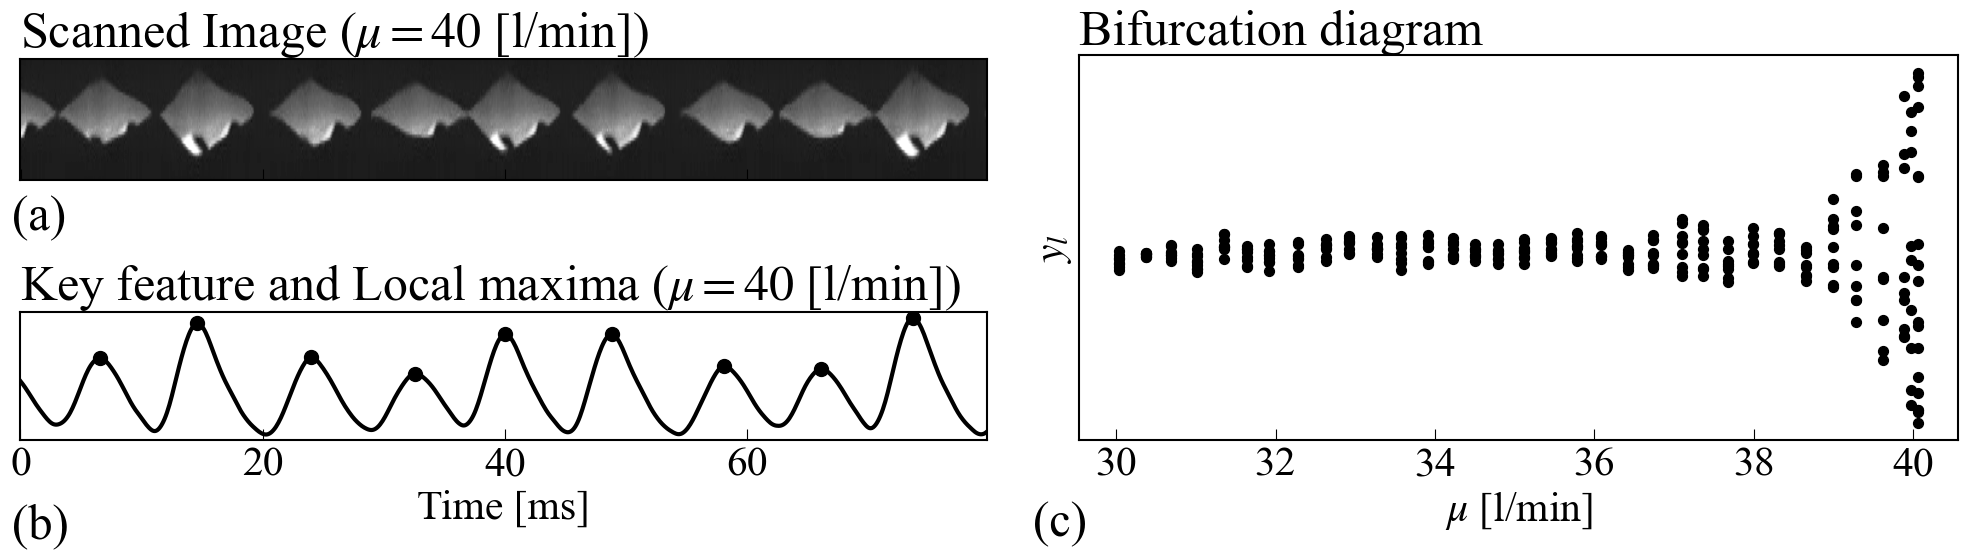

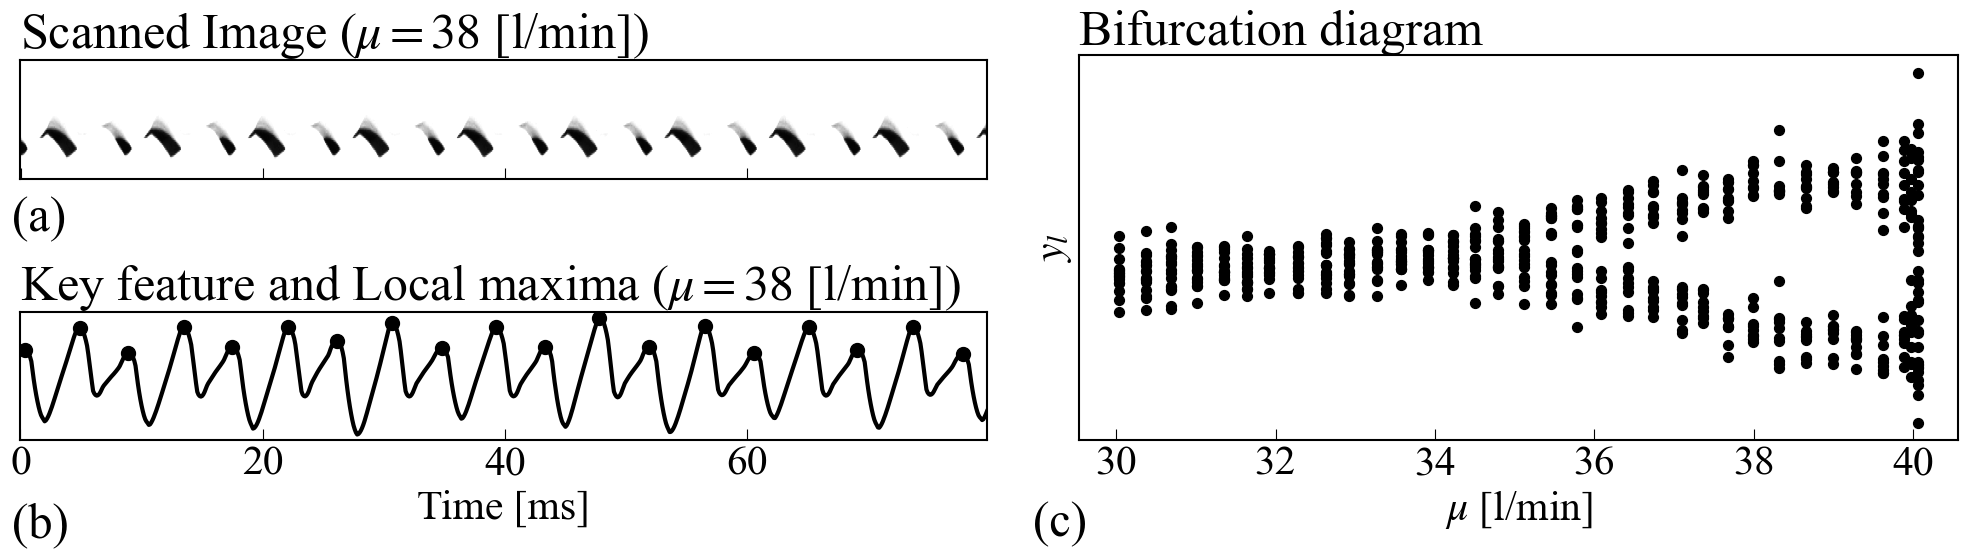

In [11]:
fig = NLP({
            'font.family':'Times New Roman',
            'mathtext.fontset':'stix',
            'font.size':30,
            'xtick.direction':'in',
            'ytick.direction':'in',
            'axes.linewidth':1.5,
            'xtick.major.size':8,
            'ytick.major.size':8,
            })

param_num = -2
fig.figure05(
            bifurcation_video_data_vf_list[param_num], 
            bifurcation_data_vf_list[param_num], bifurcation_data_vf_list_discreted[param_num], bifurcation_data_vf_list_discreted_index[param_num], bifurcation_t_data_vf_list[param_num], 
            bifurcation_data_vf_list_discreted, bifurcation_parameter_vf_list,
            figsize=(25, 5), width_ratios=[1.1, 1], wspace=0.1, height_ratios=[1, 1], hspace=1,
            title1='Scanned Image ('+r'$\mu=40$'+' [l/min])', title2='Key feature and Local maxima ('+r'$\mu=40$'+' [l/min])', title3='Bifurcation diagram',
            aspect=2.5, gamma=0.8,
            lw_lv=3, c_lv='k', label_lv='Latent vector',
            marker_lv_lm='o', s_lv_lm=10, c_lv_lm='k', label_lv_lm='Local maxima', 
            xlim=(None, None), ylim=(None, None), xlabel=r'$\mu $'+' [l/min]', ylabel=r'$y_l$', marker='.', c='k', s=200,
            panel_list = ['(a)', '(b)', '(c)'], panel_xy_list=[(0.39, 0.34), (0.39, 0.45), (0.37, 0.96)], panel_fontsize=35, 
            save_png=None, save_eps=None)

param_num = -9
fig.figure05(
                bifurcation_video_data_fvf_list[param_num], 
                bifurcation_data_fvf_list[param_num], bifurcation_data_fvf_list_discreted[param_num], bifurcation_data_fvf_list_discreted_index[param_num], bifurcation_t_data_fvf_list[param_num], 
                bifurcation_data_fvf_list_discreted, bifurcation_parameter_fvf_list,
                figsize=(25, 5), width_ratios=[1.1, 1], wspace=0.1, height_ratios=[1, 1], hspace=1,
                title1='Scanned Image ('+r'$\mu=38$'+' [l/min])', title2='Key feature and Local maxima ('+r'$\mu=38$'+' [l/min])', title3='Bifurcation diagram',
                aspect=1.4, gamma=0.5,
                lw_lv=3, c_lv='k', label_lv='Latent vector',
                marker_lv_lm='o', s_lv_lm=10, c_lv_lm='k', label_lv_lm='Local maxima', 
                xlim=(None, None), ylim=(None, None), xlabel=r'$\mu $'+' [l/min]', ylabel=r'$y_l$', marker='.', c='k', s=200,
                panel_list = ['(a)', '(b)', '(c)'], panel_xy_list=[(0.39, 0.34), (0.39, 0.45), (0.37, 0.96)], panel_fontsize=35, 
                save_png=None, save_eps=None)